In [1]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
import os,random
import numpy as np
import pandas as pd
from PIL import Image

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils



Using TensorFlow backend.


In [2]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

ROWS = 32
COLS = 32
CHANNELS = 1

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 


test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

#read image and reshape it to 32x32
def read_image(file_path):
    img = Image.open(file_path)
    img = img.resize((ROWS,COLS))
    pdata = img.getdata()
    sdata = []
    for pixil in pdata:
        Gray = (pixil[0] + pixil[1] + pixil[2])/3
        sdata.append(Gray)
    return np.asarray(sdata).reshape(32,32)

##read all image
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%5000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))


Processed 0 of 25000
Processed 5000 of 25000
Processed 10000 of 25000
Processed 15000 of 25000
Processed 20000 of 25000
Processed 0 of 12500
Processed 5000 of 12500
Processed 10000 of 12500
Train shape: (25000, 1, 32, 32)
Test shape: (12500, 1, 32, 32)


In [3]:
# get labels 1 means dog, 0 means cat
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
#test,train,valid dataset
train = train.reshape(-1, 32,32,1)
test = test.reshape(-1, 32,32,1)
X_train = train.astype('float32')
X_test = test.astype('float32')
X_train /= 255
X_test /= 255
Y_train=labels

X_valid = X_train[:5000,:,:,:]
Y_valid =   Y_train[:5000]
X_train = X_train[5001:25000,:,:,:]
Y_train  = Y_train[5001:25000]

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
#model
model = Sequential()
model.add(Convolution2D(16, 3, 3, border_mode='same', input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
                                 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=8,
          show_accuracy=True, verbose=1,
          validation_data=(X_valid, Y_valid))
          
submission = model.predict_proba(X_test, verbose=1)
test_id = range(1,12501)
predictions_df = pd.DataFrame({'id': test_id, 'label': submission[:,0]})

('Training matrix shape', (19999, 32, 32, 1))
('Testing matrix shape', (12500, 32, 32, 1))


/Users/Crossbell/anaconda/lib/python2.7/site-packages/keras/models.py:654: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 19999 samples, validate on 5000 samples
Epoch 1/8
19999/19999 [==============================] - 22s - loss: 0.6341 - acc: 0.6433 - val_loss: 0.7400 - val_acc: 0.5690
Epoch 2/8
19999/19999 [==============================] - 21s - loss: 0.5755 - acc: 0.7018 - val_loss: 0.8998 - val_acc: 0.4530
Epoch 3/8
19999/19999 [==============================] - 21s - loss: 0.5313 - acc: 0.7411 - val_loss: 0.5340 - val_acc: 0.7666
Epoch 4/8
19999/19999 [==============================] - 22s - loss: 0.5056 - acc: 0.7584 - val_loss: 0.6328 - val_acc: 0.6806
Epoch 5/8
19999/19999 [==============================] - 21s - loss: 0.4826 - acc: 0.7715 - val_loss: 0.5869 - val_acc: 0.7222
Epoch 6/8
19999/19999 [==============================] - 24s - loss: 0.4617 - acc: 0.7875 - val_loss: 0.6942 - val_acc: 0.6398
Epoch 7/8
19999/19999 [==============================] - 22s - loss: 0.4427 - acc: 0.7965 - val_loss: 0.6473 - val_acc: 0.6764
Epoch 8/8
12480/12500 [============================>.] - ETA: 

In [17]:
#samle some image to see whether we are correct
filename = []
for i in range(0,20):
    filename.append("test/"+str(i+1)+".jpg")
print filename

['test/1.jpg', 'test/2.jpg', 'test/3.jpg', 'test/4.jpg', 'test/5.jpg', 'test/6.jpg', 'test/7.jpg', 'test/8.jpg', 'test/9.jpg', 'test/10.jpg', 'test/11.jpg', 'test/12.jpg', 'test/13.jpg', 'test/14.jpg', 'test/15.jpg', 'test/16.jpg', 'test/17.jpg', 'test/18.jpg', 'test/19.jpg', 'test/20.jpg']


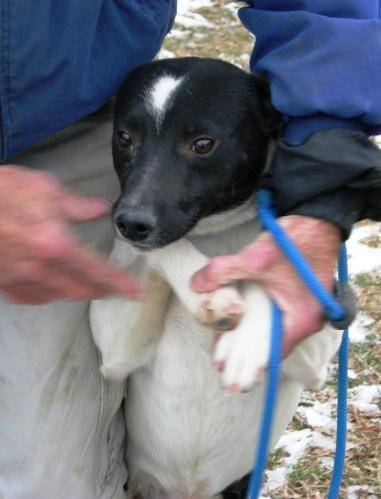

[ 0.80667293]
this might be a dog


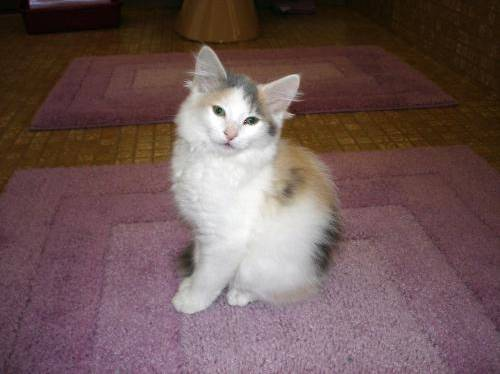

[ 0.2641052]
this might be a cat


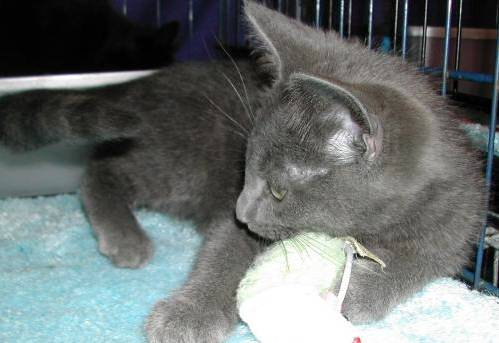

[ 0.73247874]
this might be a dog


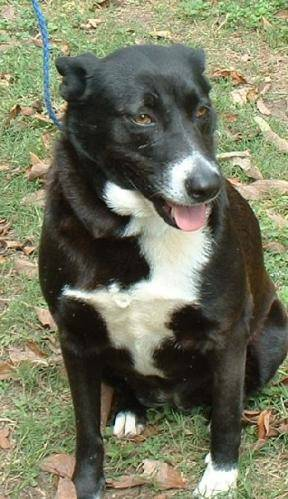

[ 0.91196215]
this might be a dog


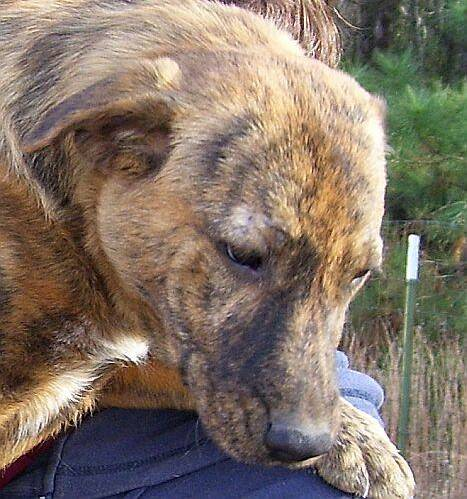

[ 0.97731495]
this might be a dog


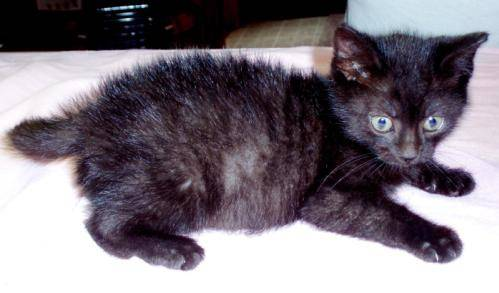

[ 0.40256578]
this might be a cat


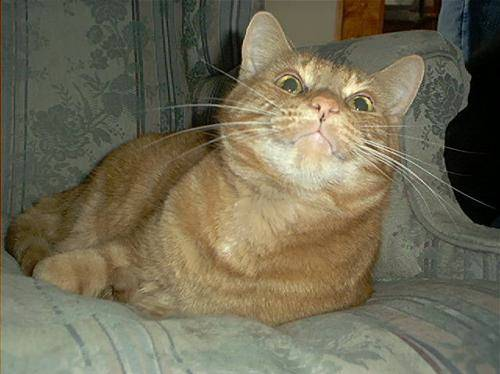

[ 0.13859974]
this might be a cat


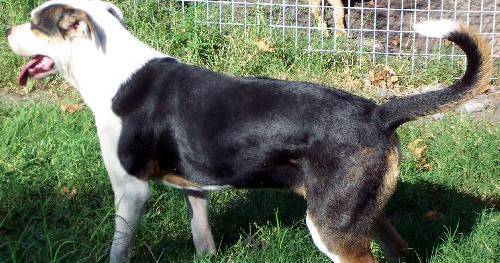

[ 0.95431018]
this might be a dog


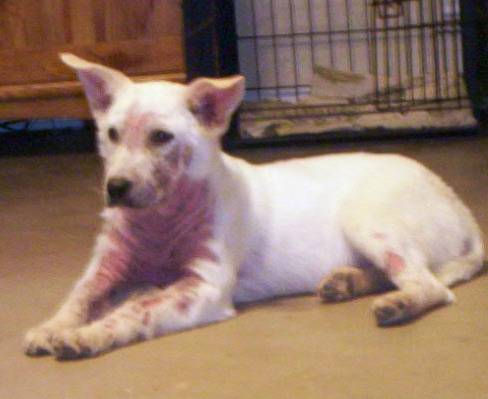

[ 0.72257954]
this might be a dog


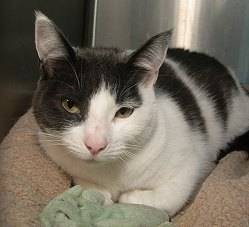

[ 0.15682758]
this might be a cat


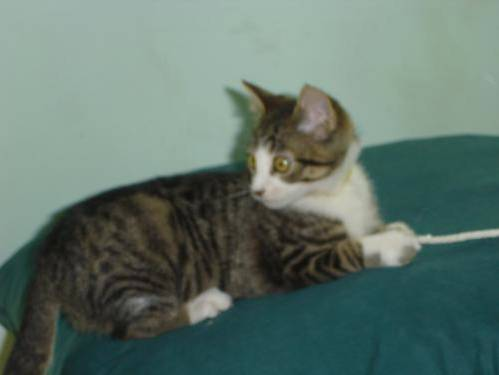

[ 0.38813683]
this might be a cat


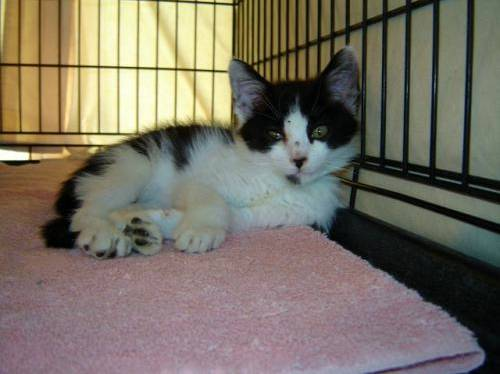

[ 0.37344092]
this might be a cat


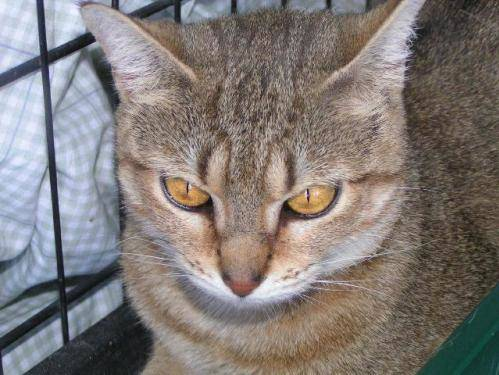

[ 0.07952716]
this might be a cat


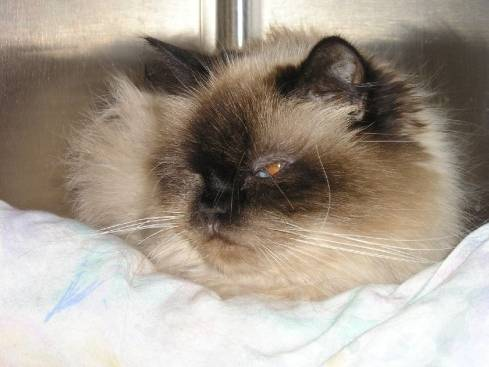

[ 0.63129646]
this might be a dog


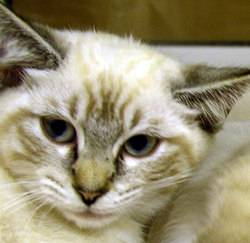

[ 0.95226681]
this might be a dog


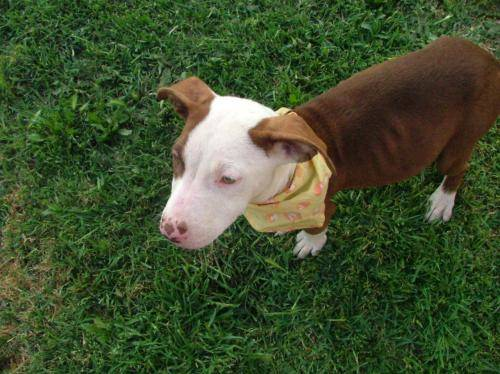

[ 0.97782671]
this might be a dog


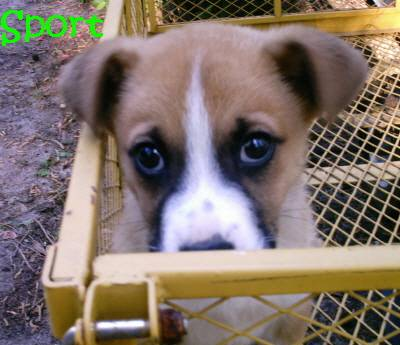

[ 0.99439973]
this might be a dog


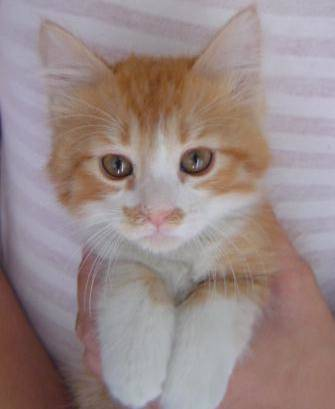

[ 0.42753357]
this might be a cat


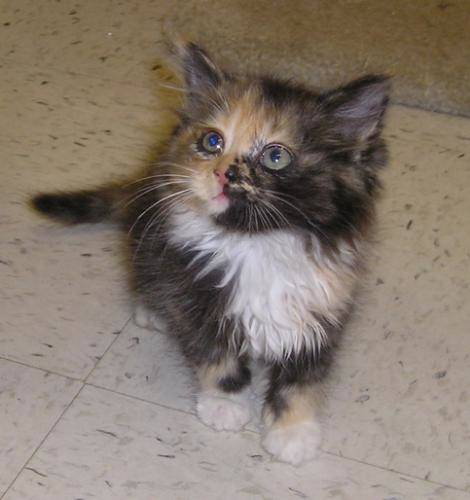

[ 0.62831581]
this might be a dog


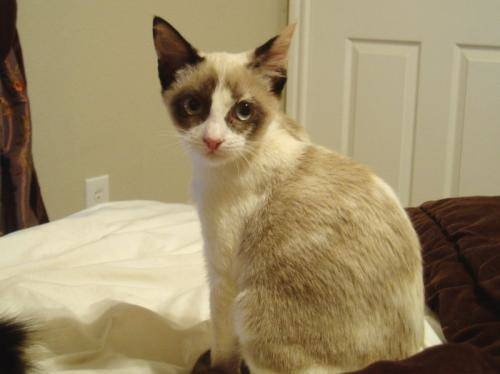

[ 0.10595351]
this might be a cat


In [29]:
from IPython.display import display ,Image
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0,20):
    image = Image(filename=test_images[i])
    display(image)
    print submission[i]
    if(submission[i] > 0.5):
        print "this might be a dog"
    else:
        print "this might be a cat"